<a href="https://colab.research.google.com/github/crystalclcm/Forecasting_CA/blob/main/Copy_of_Untitled3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Seasonal and Nonseasonal forecast for russias temperature and car crashes in california over a period of time**

**Russia** **Temperature**

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
 

In [12]:
df = pd.read_excel('scochastic russia excel(1).xlsx')

print(df)

        Month  Temperature
0  2018-01-01           -4
1  2018-02-01           -9
2  2018-03-01           -5
3  2018-04-01            7
4  2018-05-01           16
5  2018-06-01           17
6  2018-07-01           20
7  2018-08-01           20
8  2018-09-01           15
9  2018-10-01            7
10 2018-11-01           -1
11 2018-12-01           -6
12 2019-01-01           -7
13 2019-02-01           -1
14 2019-03-01            1
15 2019-04-01            8
16 2019-05-01           16
17 2019-06-01           20
18 2019-07-01           17
19 2019-08-01           16
20 2019-09-01           12
21 2019-10-01            9
22 2019-11-01            2
23 2019-12-01            1
24 2020-01-01            0
25 2020-02-01            0
26 2020-03-01            4
27 2020-04-01            5
28 2020-05-01           12
29 2020-06-01           19
30 2020-07-01           19
31 2020-08-01           18
32 2020-09-01           14
33 2020-10-01            9
34 2020-11-01            2
35 2020-12-01           -4
3

#Russias temperature is a good example of a seasonal forecast trend because it exhibits a clear and consistent pattern of seasonal variation over time. The temperature in Russia is strongly influenced by the changing seasons, with distinct periods of warm and cold weather throughout the year.

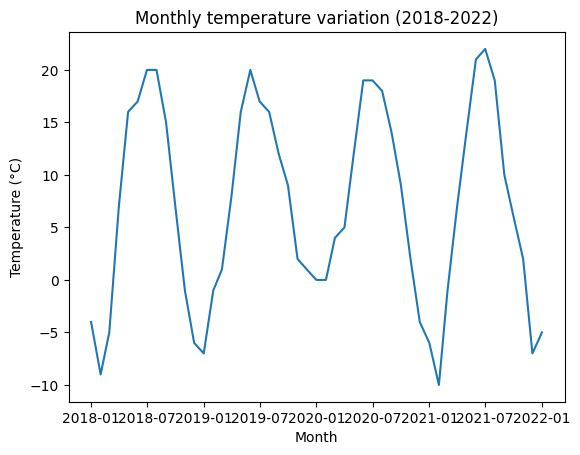

In [ ]:
plt.plot(df['Month'], df['Temperature'])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthly temperature variation (2018-2022)')
plt.show()


**car** **crashes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
 

In [19]:
books_df = pd.read_excel('Book 2.xlsx')

print(books_df)

         week  crashes
0  2022-01-06      783
1  2022-01-13      892
2  2022-01-20      942
3  2022-01-27      951
4  2022-02-03      954
5  2022-02-10     1150
6  2022-02-17     1060
7  2022-02-24     1035
8  2022-03-02     1070
9  2022-03-09     1042
10 2022-03-16     1098
11 2022-03-23     1091
12 2022-03-30      993
13 2022-04-06     1098
14 2022-04-13      993
15 2022-04-20     1039
16 2022-04-27     1097
17 2022-05-04     1105
18 2022-05-11     1135
19 2022-05-18     1043
20 2022-05-25      986
21 2022-06-01     1002
22 2022-06-08     1085
23 2022-06-15      986
24 2022-06-22     1061
25 2022-06-29     1030
26 2022-07-06     1013
27 2022-07-13     1109
28 2022-07-20     1016
29 2022-07-27     1038
30 2022-08-03     1086
31 2022-08-10     1112
32 2022-08-17     1094
33 2022-08-24     1108
34 2022-08-31     1108
35 2022-09-07     1050
36 2022-09-14     1136
37 2022-09-21     1176
38 2022-09-28     1168
39 2022-10-05     1114
40 2022-10-12     1216
41 2022-10-19     1167
42 2022-10-

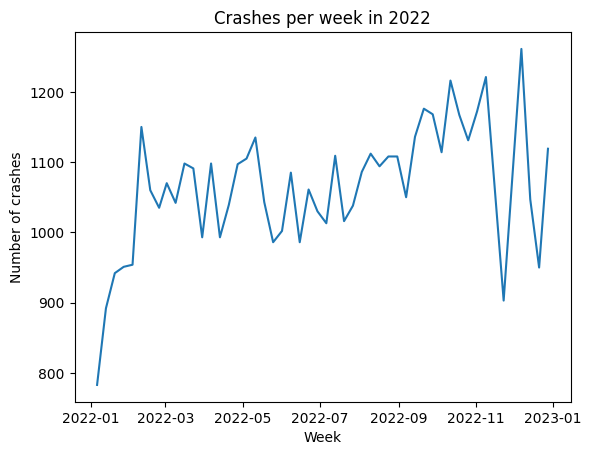

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {'week': ['2022-01-06', '2022-01-13', '2022-01-20', '2022-01-27', '2022-02-03', '2022-02-10', '2022-02-17', '2022-02-24', '2022-03-02', '2022-03-09', '2022-03-16', '2022-03-23', '2022-03-30', '2022-04-06', '2022-04-13', '2022-04-20', '2022-04-27', '2022-05-04', '2022-05-11', '2022-05-18', '2022-05-25', '2022-06-01', '2022-06-08', '2022-06-15', '2022-06-22', '2022-06-29', '2022-07-06', '2022-07-13', '2022-07-20', '2022-07-27', '2022-08-03', '2022-08-10', '2022-08-17', '2022-08-24', '2022-08-31', '2022-09-07', '2022-09-14', '2022-09-21', '2022-09-28', '2022-10-05', '2022-10-12', '2022-10-19', '2022-10-26', '2022-11-02', '2022-11-09', '2022-11-16', '2022-11-23', '2022-11-30', '2022-12-07', '2022-12-14', '2022-12-21', '2022-12-28'],
        'crashes': [783, 892, 942, 951, 954, 1150, 1060, 1035, 1070, 1042, 1098, 1091, 993, 1098, 993, 1039, 1097, 1105, 1135, 1043, 986, 1002, 1085, 986, 1061, 1030, 1013, 1109, 1016, 1038, 1086, 1112, 1094, 1108, 1108, 1050, 1136, 1176, 1168, 1114, 1216, 1167, 1131, 1172, 1221, 1062, 903, 1082, 1261, 1047, 950, 1119]
        }
df = pd.DataFrame(data)


df['week'] = pd.to_datetime(df['week'])

plt.plot(df['week'], df['crashes'])


plt.xlabel('Week')
plt.ylabel('Number of crashes')
plt.title('Crashes per week in 2022')

plt.show()


The car crash dataset in California is a good example of a non-seasonal forecast trend because it does not exhibit a clear and consistent pattern of seasonal variation over time. Instead, car crashes in California are influenced by a complex interplay of factors, including driver behavior, road conditions, and weather patterns, which can vary significantly throughout the year.

In [13]:
import pandas as pd

# Import the datasets
df1 = pd.read_excel("Book 2.xlsx")
df2 = pd.read_excel("scochastic russia excel(1).xlsx")

# Inspect the datasets
print("Dataset 1 summary:")
print(df1.head())
print(df1.describe())

print("Dataset 2 summary:")
print(df2.head())
print(df2.describe())

# Compare the datasets
if df1.equals(df2):
    print("The datasets are the same")
else:
    print("The datasets are different")

Dataset 1 summary:
        week  crashes
0 2022-01-06      783
1 2022-01-13      892
2 2022-01-20      942
3 2022-01-27      951
4 2022-02-03      954
           crashes
count    52.000000
mean   1065.000000
std      88.442515
min     783.000000
25%    1015.250000
50%    1076.000000
75%    1112.500000
max    1261.000000
Dataset 2 summary:
       Month  Temperature
0 2018-01-01           -4
1 2018-02-01           -9
2 2018-03-01           -5
3 2018-04-01            7
4 2018-05-01           16
       Temperature
count    49.000000
mean      6.959184
std       9.585056
min     -10.000000
25%      -1.000000
50%       7.000000
75%      16.000000
max      22.000000
The datasets are different


Coming back to the two data that have been shown above- "Russia's temperature from the months between 2018-2022" and "weekly crashes in the year of 2022 in California".

The first dataset, i.e., Russia's temperature, can be considered as seasonal data since temperature patterns show a cyclical trend over time. The first dataset contains information on the number of crashes per week for a certain period, with a total of 52 weeks. It has a minimum of 783 crashes, a maximum of 1261 crashes, and an average of 1065 crashes per week. The standard deviation of the data is 88.44, indicating that the data points are relatively close to the mean.


in contrast the second dataset, weekly crashes in California, can be considered as non-seasonal data since there is no clear cyclical pattern in the data.The second dataset contains monthly temperature data for a period of 49 months. The minimum temperature is -10 degrees Celsius, and the maximum is 22 degrees Celsius, with a mean of 6.96 degrees Celsius. The standard deviation is 9.59, indicating that the temperature data points are more spread out compared to the crashes data.


For seasonal data, we typically use seasonal ARIMA models, denoted as SARIMA. These models incorporate seasonal patterns into the ARIMA model by including additional terms for seasonal differencing and seasonal autoregressive and moving average components.

Based on the information provided, we can conclude that the two datasets are suitable for ARIMA modeling.

In [21]:
ad_fuller_result = adfuller(books_df['crashes'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')


ADF Statistic: -3.5924641042155887
p-value: 0.0059067430409404575


In [ ]:
eps_diff = np.diff(df['data'], n=1)

ad_fuller_result = adfuller(eps_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

In [ ]:
eps_diff2 = np.diff(eps_diff, n=1)

ad_fuller_result = adfuller(eps_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')